In [32]:
from tespa.dust_charge import Q0_precompute, compute_charge, compute_charge_array, converge_charge_array, converge_charge
from OML_tool import I_sphere
import matplotlib.pyplot as plt
import numpy as np
import pltparams




In [33]:
Te = 1e4 
Ti = 1e4 
ne0 = 1e5
ni0 = 1e5
me = 9.109e-31
mi = me * 2000
a = 1e-3

Q0e = Q0_precompute(Te, me, a)
Q0i = Q0_precompute(Ti, mi, a)

Nt = 1000
dt = 1e-1
dt_limit = 1e2

Zd = 0
V = 0
Zdt = np.zeros(Nt)
Vdt = np.zeros(Nt)


Te (K):  10000.0  Ti (K):  10000.0
Converged after  10  iterations
Converged charge:  -7030.807467326149  Potential:  -2.1540667001817133
Converged charge:  -7013.563034192691  Potential:  -2.148783429469364


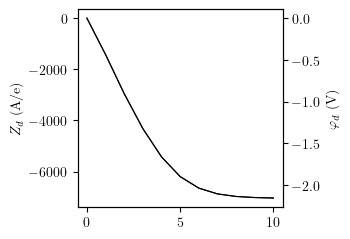

In [68]:
Te = 1e4 
Ti = 1e4 
ne0 = 1e5
ni0 = 1e5
me = 9.109e-31
mi = me * 1836
a = 4.7e-6

eV_Kelvin = 11604.51812
Te_ev = 30
Ti_ev = 3

#Te = Te_ev * eV_Kelvin
#Ti = Ti_ev * eV_Kelvin

Q0e = Q0_precompute(Te, me, a)
Q0i = Q0_precompute(Ti, mi, a)

print("Te (K): ", Te, " Ti (K): ", Ti)

Jph = -4.5 * 1e-6
Jph = 0

Zds, Vds = converge_charge_array(0, 
                    Q0e, Q0i, ne0, ni0, Te, Ti, Jph, 
                    Nt, a, tol=1e-2)
fig,ax = plt.subplots(1,1,figsize=(pltparams.double_column_width,0.67*pltparams.double_column_width))
ax.plot(Zds)
ax2 = ax.twinx()
ax2.plot(Vds)
print("Converged charge: ", Zds[-1], " Potential: ", Vds[-1])

Zd,V = converge_charge(0, 
                    Q0e, Q0i, ne0, ni0, Te, Ti, Jph, 
                    Nt, a, tol=1e-2)
#ax[0].axhline(Zd, color='r', ls='--')
#ax[1].axhline(V, color='r', ls='--')
print("Converged charge: ", Zd, " Potential: ", V)
ax.set_ylabel(r"$Z_d$ (A/e)")
ax2.set_ylabel(r"$\varphi_d$ (V)")
ax2.set_xlabel("Iteration")
fig.savefig("../DustChargePaper/figs/dust_charge_convergence.png", dpi=300)
fig.savefig("../DustChargePaper/figs/dust_charge_convergence.pdf", dpi=300)

In [35]:
def norm_phi(phi, Te):
    """Normalize potential to thermal voltage

    Args:
        phi (_type_): _description_
        Te (_type_): _description_

    Returns:
        _type_: _description_
    """
    e = 1.602e-19
    kb = 1.380649e-23
    Vth = kb*Te/e
    return phi / Vth

print("Normalized potential: ", norm_phi(V, Te))

Normalized potential:  -1.908617740183373


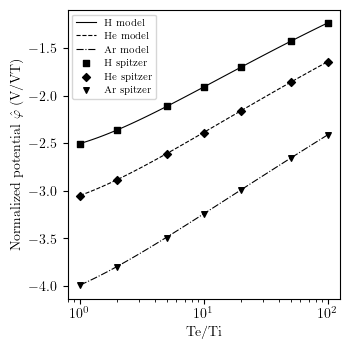

In [65]:
pltparams.use_classic_bw_lines()
au_ratio = 1.66053906660e-27 / me
ne0 = 1e15
ni0 = 1e15

mass_ratios = np.array([1.007,4.003,39.948])*au_ratio
T_ratios = [1,2,5,10,20,50,100]
T_ratios_big = np.logspace(0,2,100)
labels = ['H','He','Ar']

fig,ax = plt.subplots(figsize = pltparams.figsize_double)
for label,mr in zip(labels, mass_ratios):
    mi = me * mr
    V_norm = []
    for tr in T_ratios_big:
        Te = Ti * tr
        Q0e = Q0_precompute(Te, me, a)
        Q0i = Q0_precompute(Ti, mi, a)
        Zd,V = converge_charge(0, 
                    Q0e, Q0i, ne0, ni0, Te, Ti, Jph, 
                    Nt, a, tol=1e-2)
        V_norm.append(norm_phi(V, Te))
    ax.plot(T_ratios_big, V_norm, label=label+f" model")
ax.set_xscale('log')

HV_norm = [-2.504,-2.360,-2.114,-1.909,-1.700,-1.430,-1.236]
He_norm = [-3.052,-2.885,-2.612,-2.388,-2.160,-1.862,-1.645]
Ar_norm = [-3.994,-3.798,-3.491,-3.244,-2.992,-2.660,-2.414]

ax.scatter(T_ratios, HV_norm, marker = next(pltparams.marker_cycle), label='H spitzer')
ax.scatter(T_ratios, He_norm, marker = next(pltparams.marker_cycle), label='He spitzer')
ax.scatter(T_ratios, Ar_norm, marker = next(pltparams.marker_cycle), label='Ar spitzer')
ax.set_xlabel("Te/Ti")
ax.set_ylabel(r"Normalized potential $\hat{\varphi}$ (V/VT)")
ax.legend()

fig.savefig("../DustChargePaper/figs/dust_charge_spitzer.png", dpi=300)
fig.savefig("../DustChargePaper/figs/dust_charge_spitzer.pdf", dpi=300)



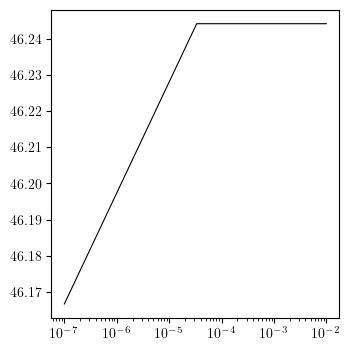

In [81]:
aa = np.linspace(1e-7,1e-2,300)

Te = 1.4e5
Ti = 1e5 
ne0 = 1e7
ni0 = 1e7
me = 9.109e-31
mi = me * 1836

Jph = -4.5 * 1e-6
Zds = []
Vds = []
for a in aa:
    Q0e = Q0_precompute(Te, me, a)
    Q0i = Q0_precompute(Ti, mi, a)
    Zd,V = converge_charge(0, 
                Q0e, Q0i, ne0, ni0, Te, Ti, Jph, 
                Nt, a, tol=1e-2)
    Zds.append(Zd)
    Vds.append(V)
fig,ax = plt.subplots(figsize = pltparams.figsize_double)
ax.plot(aa, Vds)
ax.set_xscale('log')